
# $$\textbf{Giant Pandas Could Soon Be Removed }\\\textbf{From The Endangered Species List}$$
$$\textrm{The International Union for the Conservation of Nature (IUCN) is assessing whether the giant panda can go from}\\\textrm{"endangered" to "vulnerable." The Chinese government reported in February 2015 that the giant panda populations}\\\textrm{in the wild have increased by 268 pandas — up 17 percent from a decade age. There are currently around 1,800}\\\textrm{giant pandas, which is an strong increase from the 1970's when there were only approximately only 1,000. The IUCN  }\\\textrm{says the population increase is due in part to scientific breeding methods in captivity. Once a better understanding }\\\textrm{of biology and behaviour was incorporated into husbandry, captive pandas began to mate naturally and experienced}\\\textrm{ exponential population growth.   The IUCN hasn't revealed a timetable for when the reclassification could be made.}$$

<table align="center">
<tr><td>
<img src="pandas.png" width="600px" align="center"> 
</tr></td>
</table>


# Pandas are cute cuddly animals
* They are also the Flying Circus' answer to Excel and R Data Frames
* They are built on top of NumPy NdArrays

# Objectives
* Proficiency with Pandas Series
    * Familiarity with Pandas Time Series
* Proficiency with Pandas DataFrames
    * Using the DataFrame Index
    * Creating and destroying columns
* Proficiency applying functions to rows and columns
    * DataFrame grouping and aggregation
    * DataFrames sorting
* Proficiency in linking DataFrames
    * Concatenating/Appening DataFrames
    * Merging/Joining DataFrames
* Familiarity with matplotlib and Pandas Exploratory Data Analysis (EDA) functionality 

# But first...
* Connect to a Postgres server 
    * in python 
        * using psycopg2
* Understand psycopg2's "cursors"
    * executes
    * commits
* Generate dynamic queries

# psycopg2
* A python SQL postgres server interface

In [2]:
# install homebrew: http://brew.sh

# brew cask install postgres -> double click -> applications
# brew cask install pgadmin3 -> double click -> applications, click plug
# brew tap homebrew/services
# brew services start postgresql

# https://github.com/zipfian/welcome/blob/master/notes/postgres_setup.md

# conda install psycopg2
import psycopg2

In [3]:
# Step 1: open a connection
conn = psycopg2.connect(dbname='my_postgresql_db',port=5432,password="",
                        user='schwarls37',host='localhost')

# host could be a remote database as well

<table align="center">
<tr>
<td><img src="whywouldyoudothat1.jpg" width="300px" align="center"></td> 
<td><img src="whywouldyoudothat2.jpg" width="415px" align="center"></td> 
</tr>
</table>
<table align="center">
<tr>
<td><img src="whywouldyoudothat3.jpg" width="400px" align="center"></td> 
<td><img src="whywouldyoudothat4.jpg" width="305px" align="center"></td> 
</tr>
</table>

## Allows us to combine data sources in one place
* Can use python to simultaneously pull data from other databases as well 
    * mysql-connector-python (MySql)
    * sqlite (SQLite)
    * pymongo (MongoDB)
    * sqlalchemy (all the things)

## Allows us to bring other python tools to bear
* DataFrames and associated functionality, Machine Learning tools, etc.

## Allows for easy dynamic query generation
* And hence, automation

In [4]:
# Step 2: create a cursor object
#cur.close()
cur = conn.cursor()

# The cursor interfaces and traverses the database 
# We don't have to worry about how it does it
# Queries are returned as (single iteration) generators 

In [5]:
# Step 3: execute some SQL queries
query = '''SELECT "Facility Name", "Available Residential Beds" 
           FROM Beds 
           WHERE "City" = 'Cuba' 
           LIMIT 10'''

cur.execute(query)

In [125]:
# If you see this error 

print "InternalError: current transaction is aborted, commands ignored until end of transaction block"

# Then the cursor is chocking on a current command 
# and it needs to be aborted with: conn.rollback()

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [6]:
for row in cur:
    print row

('Cuba Memorial Hospital Inc SNF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ', 4)
('Cuba Memorial Hospital Inc SNF                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [7]:
for row in cur:
    print row
    
# See, I told you: cur saves results as a (one pass) generator    

In [ ]:
# Other options for iterating through the generator

# cur.fetchone(), or cur.next()
# cur.fetchmany(n)
# cur.fetchall()

In [8]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "Available Residential Beds" 
           TO "Available_Residential_Beds" '''

cur.execute(query)

In [9]:
# Step 4: commit SQL actions 
# (to actually make the changes to the DB permanent)

conn.commit()
# conn.autocommit = True

# database level operations are also available

In [10]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "Available_Residential_Beds" 
           TO "Available Residential Beds" '''
cur.execute(query)
conn.commit()

In [ ]:
my_name = "Scott"
unsafe_query = '''SELECT * FROM Users 
                  WHERE Name = ''' + my_name

# what if...
my_name = "Scott; DROP TABLE Users"

# This is called SQL Injection and it's obviously risky

In [ ]:
# Instead 
my_name = "Scott; DROP TABLE Users"

cur.execute('''SELECT * FROM Users WHERE Name = %s''', (my_name,))

# will search for rows in Name *exactly* equal to 'Scott; DROP TABLE Users'

In [116]:
# Step 5: close the connection

cur.close() # optional, automatically close with conn.close()
conn.close()

# Pandas are very functional

<table align="center">
<tr>
<td><img src="panda3.jpg" width="335px" align="center"></td> 
<td><img src="panda2.jpg" width="150px" align="center"></td> 
<td><img src="panda6.jpg" width="400px" align="center"></td> 
<tr><td>Satisfied Panda</td><td>Red Handed Panda</td><td>Sexy Panda</td></tr>


</tr>
</table>
<table align="center">
<tr>
<td><img src="panda1.jpg" width="206px" align="center"></td> 
<td><img src="panda4.jpg" width="230px" align="center"></td> 
<td><img src="panda7.jpg" width="231px" align="center"></td> 
<td><img src="panda8.jpg" width="211px" align="center"></td> 
<tr><td>Work Out Panda</td><td>Sherrif Panda</td><td>Killer Panda</td><td>Other Work Out Panda</td></tr>
</tr>
</table>

# (Standard Library) Lists
* concatenate

In [14]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

# Numpy NdArrays
* operate elementwise

In [15]:
import numpy as np

In [17]:
np.array([1,2,3]) + np.arange(3) + np.linspace(10,12,3)

array([ 11.,  14.,  17.])

# Numpy NdArrays

* have types

In [18]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print ints.dtype, chars.dtype, strings.dtype

int64 |S1 |S3


# Speed

https://ipython.org/ipython-doc/3/interactive/magics.html

In [21]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print "python list"
time = %timeit -r 1 -o sum(python_list)
print time.all_runs[0]/time.loops 

print "\n" + "numpy array"
time = %timeit -r 1 -o np.sum(numpy_array)
print time.all_runs[0]/time.loops

print "\n" + "numpy array -- standard library sum"
time = %timeit -r 1 -o sum(numpy_array)
print time.all_runs[0]/time.loops

python list
100 loops, best of 1: 7.7 ms per loop
0.00770471096039

numpy array
1000 loops, best of 1: 615 µs per loop
0.000614989042282

numpy array -- standard library sum
10 loops, best of 1: 81.5 ms per loop
0.0815062999725


# Broadcasting

http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

In [23]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print a.shape, b.shape 
print "\n"
print a + b

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations
# cool.

(2, 1) (2, 2)


[[ 11  12]
 [-11 -12]]


In [55]:
a = np.array([[10, 0, -10],[-10, 0, -10]]) 
b = np.array([[1,2],[-1,-2]]) 
print a.shape, b.shape 
print ""
print a + b

# it's not clear how it should fill up in this case... so it can't/doesn't

(2, 3) (2, 2)



ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

In [27]:
#a = 10
#a = np.array(10)
#a = np.array([10])
b = np.array([[1,2],[-1,-2]]) 

print a.shape, b.shape 
print "\n"
#print a + b

() (2, 2)


[[11 12]
 [ 9  8]]


# Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**


In [28]:
import pandas as pd

In [31]:
series = pd.Series([5775,373,7,42,np.nan,33])
print series
print "\n"
print series.shape

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [34]:
world_series = pd.Series(["royals","giants","sox","giants","cards","giants","...",None])
world_series

0    royals
1    giants
2       sox
3    giants
4     cards
5    giants
6       ...
7      None
dtype: object

# Pandas Date Series
* are fancy

In [35]:
bdays = pd.date_range(start='19821107', periods=33+1, freq=pd.DateOffset(years=1))
bdays

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07', '1985-11-07',
               '1986-11-07', '1987-11-07', '1988-11-07', '1989-11-07',
               '1990-11-07', '1991-11-07', '1992-11-07', '1993-11-07',
               '1994-11-07', '1995-11-07', '1996-11-07', '1997-11-07',
               '1998-11-07', '1999-11-07', '2000-11-07', '2001-11-07',
               '2002-11-07', '2003-11-07', '2004-11-07', '2005-11-07',
               '2006-11-07', '2007-11-07', '2008-11-07', '2009-11-07',
               '2010-11-07', '2011-11-07', '2012-11-07', '2013-11-07',
               '2014-11-07', '2015-11-07'],
              dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

### After you learn Pandas you might care about using Date Series Types and the following could be useful:
* df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
* df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))



# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 
<br>
<br>

$$\huge \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$
<br>

In [63]:
mixedTypes_df = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","try"]),
                     'F' : 'foo' })

# mixedTypes_df.to_dict() 

print mixedTypes_df
print ""
print mixedTypes_df.shape
print ""
mixedTypes_df.dtypes

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3    try  foo

(4, 6)



A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Additional Numpy NdArray
* stuff that will be useful

In [37]:
noise_ndarray = np.random.randn(34,6)
print noise_ndarray
print ""
print noise_ndarray.shape
print ""
print noise_ndarray.flatten() # copy
print ""
print noise_ndarray.flatten().shape
print ""
print noise_ndarray.ravel() # view
print ""
print noise_ndarray.ravel().shape

[[ 0.47121733 -0.25643885  0.78207717  0.75463626  0.71096569  0.23131279]
 [-0.04407158 -2.30281126 -0.56210903  0.6607276   0.83715681 -1.02660494]
 [-1.50609207  2.28700137 -1.60259894 -0.68373118  0.08976424 -0.35915777]
 [ 0.75669601 -1.3239726  -0.24216919  1.47376015  1.31826453  0.2920129 ]
 [ 1.23107605 -2.02764223  0.11287285  0.15879194 -1.50046846 -0.58007476]
 [ 0.36320263 -0.94458074 -0.65537711 -0.39833202 -0.27013216  1.58960723]
 [ 0.14460572 -1.17718033  0.75600295  0.73952493 -0.45011358  2.07776876]
 [-0.87885378 -0.410672   -0.33652736 -0.263574    1.01691106 -0.24733798]
 [ 0.01917757 -0.63765012 -0.52872732 -0.03732646 -0.17997163 -0.26599812]
 [ 0.20324758 -1.56548454  1.05346918  0.79010606  1.46311347  0.09656138]
 [ 3.29467113 -1.12208655  0.47304863 -0.62594808 -0.20803665  0.61235211]
 [-0.95357966  0.39595105  0.55823028 -0.05098055  0.69778223  0.34492933]
 [ 0.59223567 -0.58184318 -0.40253307 -0.76632496 -0.55382066  0.7399008 ]
 [ 0.80715188  0.42888101

In [38]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 

In [40]:
# np bonus (+ pandas foreshadowing):
# applying functions by rows or columns

print noise_ndarray.shape
print "\n" + "sum, axis=0"
print noise_ndarray.sum(axis=0)
print "\n" + "sum, axis=1"
print noise_ndarray.sum(axis=1)
print "\n" + "mean, axis=0"
print noise_ndarray.mean(axis=0)
print "\n" + "std, axis=0"
print noise_ndarray.std(axis=0)
print "\n" + "max, axis=0"
print noise_ndarray.max(axis=0)
print "\n" + "min, axis=0"
print noise_ndarray.min(axis=0)
print "\n" + "argmax, axis=0"
print noise_ndarray.argmax(axis=0)
print "\n" + "argmin, axis=0"
print noise_ndarray.argmin(axis=0)

(34, 6)

sum, axis=0
[ 4.11656427 -7.24578871  2.3475528  -5.48950655  3.39344407 -2.79868088]

sum, axis=1
[ 2.69377039 -2.43771239 -1.77481434  2.27459181 -2.6054446  -0.31561218
  2.09060846 -1.12005407 -1.63049608  2.04101313  2.42400059  0.99233268
 -0.97238541  1.71517765 -0.04977733 -3.20397849 -1.43746743 -1.79974755
  0.39551625  3.46674558 -1.68289328 -1.30335014  1.19181673 -0.13024547
 -3.94109299  3.37218919  1.54814951  0.27129343  0.34618023 -3.2571972
  0.50685154 -6.56014333  3.97216139 -0.7564013 ]

mean, axis=0
[ 0.12107542 -0.21311143  0.06904567 -0.16145607  0.09980718 -0.08231414]

std, axis=0
[ 1.00065353  0.9625469   1.01637071  0.80791123  0.77327323  0.98506044]

max, axis=0
[ 3.29467113  2.28700137  2.16771448  1.47376015  1.80096801  2.9077051 ]

min, axis=0
[-1.93555024 -2.30281126 -2.73394318 -2.15188366 -1.50046846 -3.02701949]

argmax, axis=0
[10  2 32  3 25 25]

argmin, axis=0
[17  1 31 21  4 31]


# Manipulating Pandas Indexes

In [205]:
noise_df = pd.DataFrame(noise_ndarray, index=bdays, columns=list('ABC123'))
noise_df
#noise_df.values # as_matrix()
#noise_df.index
#noise_df.index.values
#noise_df.index.tolist()
#noise_df.columns

#noise_df.reset_index()
#noise_df.set_index("A")
#noise_df.reset_index().set_index("A")
# what is noise.df now?

#noise_df.rename(columns={'A': 'a'}, inplace=True)

array([[ 0.47121733,  0.25643885,  0.78207717,  0.75463626,  0.71096569,
         0.23131279],
       [ 0.04407158,  2.30281126,  0.56210903,  0.6607276 ,  0.83715681,
         1.02660494],
       [ 1.50609207,  2.28700137,  1.60259894,  0.68373118,  0.08976424,
         0.35915777],
       [ 0.75669601,  1.3239726 ,  0.24216919,  1.47376015,  1.31826453,
         0.2920129 ],
       [ 1.23107605,  2.02764223,  0.11287285,  0.15879194,  1.50046846,
         0.58007476],
       [ 0.36320263,  0.94458074,  0.65537711,  0.39833202,  0.27013216,
         1.58960723],
       [ 0.14460572,  1.17718033,  0.75600295,  0.73952493,  0.45011358,
         2.07776876],
       [ 0.87885378,  0.410672  ,  0.33652736,  0.263574  ,  1.01691106,
         0.24733798],
       [ 0.01917757,  0.63765012,  0.52872732,  0.03732646,  0.17997163,
         0.26599812],
       [ 0.20324758,  1.56548454,  1.05346918,  0.79010606,  1.46311347,
         0.09656138],
       [ 3.29467113,  1.12208655,  0.47304863,  0.

In [89]:
noise_df.T

,1982-11-07 00:00:00,1983-11-07 00:00:00,1984-11-07 00:00:00,1985-11-07 00:00:00,1986-11-07 00:00:00,1987-11-07 00:00:00,1988-11-07 00:00:00,1989-11-07 00:00:00,1990-11-07 00:00:00,1991-11-07 00:00:00,...,2006-11-07 00:00:00,2007-11-07 00:00:00,2008-11-07 00:00:00,2009-11-07 00:00:00,2010-11-07 00:00:00,2011-11-07 00:00:00,2012-11-07 00:00:00,2013-11-07 00:00:00,2014-11-07 00:00:00,2015-11-07 00:00:00
A,0.223455,1.143640,-0.847588,-0.040759,0.469407,1.119557,0.008528,-0.051043,-1.160633,1.530179,...,0.261242,-0.179610,-0.080085,-1.562934,-0.696515,-0.564703,-0.192406,0.288575,0.012224,0.527937
B,-0.315372,-1.800178,1.204021,-3.025320,-0.518300,-1.237210,-0.659685,-0.050621,-1.575768,0.896611,...,0.915562,-1.189991,-1.185440,0.578027,-0.617338,0.435665,-1.040221,-1.975519,-0.243021,0.177839
C,2.039151,0.413200,1.191296,2.584646,-1.768489,-0.217231,-0.229640,-0.107561,-0.019104,0.825292,...,-0.308665,-1.518942,0.045684,-0.124105,1.688148,-0.103989,0.526933,-1.623684,0.044564,-1.221750
1,1.457285,-0.368386,0.138808,0.532602,0.932778,-1.055011,0.135064,-0.104362,0.806605,0.203254,...,0.416707,0.284589,0.349684,-1.327166,0.924072,1.744149,-0.728467,-0.092136,1.148207,1.244011
2,0.129330,0.771809,-0.435669,-1.169972,0.409914,1.060421,-1.215190,-0.237202,1.930713,0.800391,...,-0.306892,0.137632,0.435510,1.512476,0.286418,1.696863,0.133072,1.760563,0.622514,-1.173027
3,-1.324212,-0.613966,1.843777,-0.714218,-1.525493,0.037590,-0.767508,0.250522,0.512709,-0.735254,...,-0.123701,1.681423,0.024056,0.544830,-0.546033,1.866506,0.258659,0.382124,0.906184,0.940723


# Pandas Sorting

In [76]:
noise_df
#noise_df.sort_index(axis=1, ascending=False)
#noise_df.sort_index(axis=0, ascending=False)
#noise_df.sort_values(by='B')

,A,B,C,1,2,3
1983-11-07,-0.044072,-2.302811,-0.562109,0.660728,0.837157,-1.026605
1986-11-07,1.231076,-2.027642,0.112873,0.158792,-1.500468,-0.580075
1991-11-07,0.203248,-1.565485,1.053469,0.790106,1.463113,0.096561
1985-11-07,0.756696,-1.323973,-0.242169,1.473760,1.318265,0.292013
1988-11-07,0.144606,-1.177180,0.756003,0.739525,-0.450114,2.077769
1992-11-07,3.294671,-1.122087,0.473049,-0.625948,-0.208037,0.612352
2015-11-07,0.422942,-1.108082,0.241116,-0.381025,0.309275,-0.240628
1987-11-07,0.363203,-0.944581,-0.655377,-0.398332,-0.270132,1.589607
2007-11-07,-0.813797,-0.903429,-0.230719,0.611461,1.800968,2.907705
2011-11-07,-1.297008,-0.706931,-0.181103,-1.032904,-0.163862,0.124611


# Accessing Data in Pandas
* is kind of special

In [115]:
print noise_ndarray#[:4,:4]
#is this a matrix?

print noise_df.head()
noise_df.columns
#noise_df[:4,:4]

# ANSWER THESE
#how to get rows?
#how to get columns?

#.values
#.tolist()

[[ 0.47121733  0.25643885  0.78207717  0.75463626  0.71096569  0.23131279]
 [ 0.04407158  2.30281126  0.56210903  0.6607276   0.83715681  1.02660494]
 [ 1.50609207  2.28700137  1.60259894  0.68373118  0.08976424  0.35915777]
 [ 0.75669601  1.3239726   0.24216919  1.47376015  1.31826453  0.2920129 ]
 [ 1.23107605  2.02764223  0.11287285  0.15879194  1.50046846  0.58007476]
 [ 0.36320263  0.94458074  0.65537711  0.39833202  0.27013216  1.58960723]
 [ 0.14460572  1.17718033  0.75600295  0.73952493  0.45011358  2.07776876]
 [ 0.87885378  0.410672    0.33652736  0.263574    1.01691106  0.24733798]
 [ 0.01917757  0.63765012  0.52872732  0.03732646  0.17997163  0.26599812]
 [ 0.20324758  1.56548454  1.05346918  0.79010606  1.46311347  0.09656138]
 [ 3.29467113  1.12208655  0.47304863  0.62594808  0.20803665  0.61235211]
 [ 0.95357966  0.39595105  0.55823028  0.05098055  0.69778223  0.34492933]
 [ 0.59223567  0.58184318  0.40253307  0.76632496  0.55382066  0.7399008 ]
 [ 0.80715188  0.42888101

Index([u'A', u'B', u'C', u'1', u'2', u'3'], dtype='object')

In [81]:
watchOut_df = pd.DataFrame(np.random.randn(3,3), index=list('ABC'), columns=range(3))
print watchOut_df
print ""
print watchOut_df.columns
print ""

#watchOut_df[:1]
#watchOut_df[[0,1]]
#watchOut_df["1"]

          0         1         2
A  0.168867 -1.034741 -0.447777
B  0.083953  0.253786  1.142143
C -0.336266  1.057626  0.425597

Int64Index([0, 1, 2], dtype='int64')



# The *.loc*

In [84]:
print noise_df[:3]
print ""
print bdays[:3]
print ""
print noise_df.columns, noise_df.columns.values, noise_df.columns.tolist()

noise_df.loc[bdays[0]]
#noise_df.loc[["B","C"]] # hint: ,

#noise_df.loc[:,[1,2]] # hint: "
#noise_df.loc[:3,["B","C"]]

#noise_df.loc[bdays[:3],["B","C"]]
#noise_df.loc[bdays[1]:bdays[3],["B","C"]]

                   A         B         C         1         2         3
1982-11-07  0.471217 -0.256439  0.782077  0.754636  0.710966  0.231313
1983-11-07 -0.044072 -2.302811 -0.562109  0.660728  0.837157 -1.026605
1984-11-07 -1.506092  2.287001 -1.602599 -0.683731  0.089764 -0.359158

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07'], dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

Index([u'A', u'B', u'C', u'1', u'2', u'3'], dtype='object') ['A' 'B' 'C' '1' '2' '3'] ['A', 'B', 'C', '1', '2', '3']


A    0.471217
B   -0.256439
C    0.782077
1    0.754636
2    0.710966
3    0.231313
Name: 1982-11-07 00:00:00, dtype: float64

# The *.iloc*
* as opposed to the *.loc*

In [96]:
#print noise_df.iloc[bdays[0]:bdays[3],["B","C"]]
print noise_df.iloc[2:5,2:5]

                   C         1         2
1984-11-07  1.191296  0.138808 -0.435669
1985-11-07  2.584646  0.532602 -1.169972
1986-11-07 -1.768489  0.932778  0.409914


# The *.ix*
* as opposed(?) to the *.loc* and the *.iloc*

In [97]:
print noise_df.ix[:4,1:3]
print ""
print noise_df.ix[:bdays[3],1:3]
print ""
print noise_df.ix[:4,['B','C']]
print ""
print noise_df.ix[:bdays[3],['B','C']]
print ""

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646

                   B         C
1982-11-07 -0.315372  2.039151
1983-11-07 -1.800178  0.413200
1984-11-07  1.204021  1.191296
1985-11-07 -3.025320  2.584646



# The *.at/.iat*?

# Boolean Indexing

In [86]:
# OH, BTW, LOOK! READING IN CSV'S... 
# Just like with RDBMS's you can basically read in any file flavor you want...

Schools_df = pd.read_csv("Schools.csv")
Players_df = pd.read_csv("SchoolsPlayers.csv")

# & | ~ == VERSUS and or not equals

Schools_df[(Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) 
           | ((Schools_df.schoolCity.astype(str) == "Austin") & 
              ~(Schools_df["schoolName"].astype(str) == "University of Texas at Austin")) ] 

,schoolID,schoolName,schoolCity,schoolState,schoolNick
131,concrdiatx,Concordia University at Austin,Austin,TX,Tornados
180,etxbaptist,East Texas Baptist University,Marshall,TX,Tigers
565,stedwardtx,St. Edward's University,Austin,TX,Hilltoppers
618,trinitytx,Trinity University,San Antonio,TX,Tigers
628,txsouth,Texas Southern University,Houston,TX,Tigers


In [87]:
kp = (Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) | \
    ((Schools_df.schoolCity.astype(str) == "Austin") & ~(Schools_df.schoolName.astype(str) == "University of Texas at Austin"))
print Schools_df.ix[kp, ["schoolName","schoolNick"]]
print ""
print Schools_df.loc[kp, "schoolName":"schoolNick"]
print ""
print Schools_df.iloc[kp ,1:2]

                         schoolName   schoolNick
131  Concordia University at Austin     Tornados
180   East Texas Baptist University       Tigers
565         St. Edward's University  Hilltoppers
618              Trinity University       Tigers
628       Texas Southern University       Tigers

                         schoolName   schoolCity schoolState   schoolNick
131  Concordia University at Austin       Austin          TX     Tornados
180   East Texas Baptist University     Marshall          TX       Tigers
565         St. Edward's University       Austin          TX  Hilltoppers
618              Trinity University  San Antonio          TX       Tigers
628       Texas Southern University      Houston          TX       Tigers



NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [62]:
noise_nparray = np.random.randn(34,6)
noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
print noise_df[:3]
print ""
print noise_df[noise_df > 0]
print ""

                   A         B         C         1         2         3
1982-11-07 -1.234592  0.657422 -0.474902  0.577298 -0.103916  0.533183
1983-11-07 -1.038768 -0.306006 -0.470059  0.458310 -0.769214 -1.973304
1984-11-07 -0.840815  0.459439  0.044360  1.339315 -1.930242 -1.208807

                   A         B         C         1         2         3
1982-11-07       NaN  0.657422       NaN  0.577298       NaN  0.533183
1983-11-07       NaN       NaN       NaN  0.458310       NaN       NaN
1984-11-07       NaN  0.459439  0.044360  1.339315       NaN       NaN
1985-11-07       NaN       NaN       NaN  2.594043       NaN  0.811433
1986-11-07       NaN       NaN  0.264803       NaN       NaN  0.975840
1987-11-07       NaN  1.928900  0.850624  0.522374       NaN  0.369860
1988-11-07       NaN       NaN       NaN  0.885845  0.515287       NaN
1989-11-07  1.634142       NaN  0.405318       NaN       NaN       NaN
1990-11-07       NaN  0.445144  1.055741  0.776954       NaN       NaN
1991-

# *Copy* versus *View* 
* and not accidentally editing another variables memory 

In [91]:
abs_noise_df = noise_df

print "noise_df[:3]" 
print noise_df[:3] 

abs_noise_df[abs_noise_df < 0] = -abs_noise_df[abs_noise_df < 0] 

print "\n"+"abs_noise_df[:3]"
print abs_noise_df[:3] 

print "\n"+"noise_df[:3]" 
print noise_df[:3] 
print "\n"+"noise_nparray[:3]" 
print noise_ndarray[:3] 

# Do you have a problem with this?

noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  0.471217  0.256439  0.782077  0.754636  0.710966  0.231313
1983-11-07  0.044072  2.302811  0.562109  0.660728  0.837157  1.026605
1984-11-07  1.506092  2.287001  1.602599  0.683731  0.089764  0.359158

abs_noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  0.471217  0.256439  0.782077  0.754636  0.710966  0.231313
1983-11-07  0.044072  2.302811  0.562109  0.660728  0.837157  1.026605
1984-11-07  1.506092  2.287001  1.602599  0.683731  0.089764  0.359158

noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  0.471217  0.256439  0.782077  0.754636  0.710966  0.231313
1983-11-07  0.044072  2.302811  0.562109  0.660728  0.837157  1.026605
1984-11-07  1.506092  2.287001  1.602599  0.683731  0.089764  0.359158

noise_nparray[:3]
[[ 0.47121733  0.25643885  0.78207717  0.75463626  0.71096569  0.23131279]
 [ 0.0440

In [92]:
noise_nparray = np.random.randn(34,6)
noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
abs_noise_df = noise_df.copy()

In [93]:
abs_noise_df[abs_noise_df < 0] = -abs_noise_df[abs_noise_df < 0] 

print "abs_noise_df[:3]"
print abs_noise_df[:3] 
print "\n"+"noise_df[:3]" 
print noise_df[:3] 
print "\n"+"noise_nparray[:3]" 
print noise_nparray[:3] 

# much better

abs_noise_df[:3]
                   A         B         C         1         2         3
1982-11-07  0.007808  0.411334  1.611592  1.300751  0.179301  0.057873
1983-11-07  0.549681  2.207627  1.879017  0.573318  1.454595  1.057948
1984-11-07  1.563966  2.710953  2.337037  0.029522  2.466543  1.024853

noise_df[:3]
                   A         B         C         1         2         3
1982-11-07 -0.007808 -0.411334 -1.611592  1.300751  0.179301  0.057873
1983-11-07  0.549681  2.207627  1.879017  0.573318  1.454595  1.057948
1984-11-07  1.563966 -2.710953  2.337037 -0.029522 -2.466543 -1.024853

noise_nparray[:3]
[[-0.00780832 -0.41133411 -1.61159153  1.30075145  0.17930114  0.05787302]
 [ 0.54968052  2.20762685  1.87901706  0.57331766  1.45459494  1.05794776]
 [ 1.56396603 -2.71095302  2.33703727 -0.02952166 -2.466543   -1.02485306]]


# Adding Columns

In [121]:
mixedTypes_df = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","try"]),
                     'F' : 'foo' })

mixedTypes_augmented_df = mixedTypes_df.copy()

mixedTypes_augmented_df['F'] = mixedTypes_augmented_df['F'] + " fighter"
mixedTypes_augmented_df['G'] = 'hommies'

print "mixedTypes_df"
print mixedTypes_df
print "\n"+"mixedTypes_augmented_df"
print mixedTypes_augmented_df

mixedTypes_df
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3    try  foo

mixedTypes_augmented_df
     A          B    C  D      E            F        G
0  1.0 2013-01-02  1.0  3   test  foo fighter  hommies
1  1.0 2013-01-02  1.0  3  train  foo fighter  hommies
2  1.0 2013-01-02  1.0  3   test  foo fighter  hommies
3  1.0 2013-01-02  1.0  3    try  foo fighter  hommies


# Missing Values

In [122]:
mixedTypes_df[mixedTypes_df.E=="test"]=np.nan
print mixedTypes_df

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo


In [123]:
print mixedTypes_df
print ""
print mixedTypes_df.dropna(how='any') #df.dropna(subset=['a']) # there's probably an "inplace"...
print ""
print mixedTypes_df

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo

     A          B    C    D      E    F
1  1.0 2013-01-02  1.0  3.0  train  foo
3  1.0 2013-01-02  1.0  3.0    try  foo

     A          B    C    D      E    F
0  NaN        NaT  NaN  NaN    NaN  NaN
1  1.0 2013-01-02  1.0  3.0  train  foo
2  NaN        NaT  NaN  NaN    NaN  NaN
3  1.0 2013-01-02  1.0  3.0    try  foo


In [135]:
mixedTypes_df.F = mixedTypes_df['F'].fillna(value="I pity the")

print mixedTypes_df
print "\n"
print pd.isnull(mixedTypes_df)
print "\n"
print pd.notnull(mixedTypes_df)

mixedTypes_df.loc[pd.isnull(mixedTypes_df.D),'D'] = 2
mixedTypes_df

     A          B    C    D      E           F
0  NaN        NaT  NaN  2.0    NaN  I pity the
1  1.0 2013-01-02  1.0  3.0  train         foo
2  NaN        NaT  NaN  2.0    NaN  I pity the
3  1.0 2013-01-02  1.0  3.0    try         foo


       A      B      C      D      E      F
0   True   True   True  False   True  False
1  False  False  False  False  False  False
2   True   True   True  False   True  False
3  False  False  False  False  False  False


       A      B      C     D      E     F
0  False  False  False  True  False  True
1   True   True   True  True   True  True
2  False  False  False  True  False  True
3   True   True   True  True   True  True


,A,B,C,D,E,F
0,NaN,NaT,NaN,2.0,NaN,I pity the
1,1.0,2013-01-02,1.0,3.0,train,foo
2,NaN,NaT,NaN,2.0,NaN,I pity the
3,1.0,2013-01-02,1.0,3.0,try,foo


# Applying functions to Data
## A.k.a., transforming data, doing stuff to data, etc.
<br>
$$\huge \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$

* http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In [136]:
for i in range(6):
    noise_df.iloc[i,i] = np.nan

print noise_df[:8]
print "\n" + "mean, axis=0"
print noise_df.mean(axis=0) 
print "\n" + "mean, axis=1"
print noise_df.mean(axis=1) 

                   A         B         C         1         2         3
1982-11-07       NaN -0.411334 -1.611592  1.300751  0.179301  0.057873
1983-11-07  0.549681       NaN  1.879017  0.573318  1.454595  1.057948
1984-11-07  1.563966 -2.710953       NaN -0.029522 -2.466543 -1.024853
1985-11-07  0.564338  1.043557  1.151437       NaN -0.487925 -0.683045
1986-11-07 -0.041612 -0.038435  0.005970  0.089865       NaN  1.076744
1987-11-07 -2.026642  1.342388  0.937905 -0.123790 -1.267368       NaN
1988-11-07  0.420695 -1.714822 -1.501682  0.519041  0.922544 -0.112361
1989-11-07 -0.352236  0.602347  0.450418  0.993243  0.301919  0.422250

mean, axis=0
A    0.009016
B    0.126480
C    0.140448
1    0.076076
2    0.059190
3    0.110445
dtype: float64

mean, axis=1
1982-11-07   -0.097000
1983-11-07    1.102912
1984-11-07   -0.933581
1985-11-07    0.317673
1986-11-07    0.218506
1987-11-07   -0.227501
1988-11-07   -0.244431
1989-11-07    0.402990
1990-11-07   -0.210788
1991-11-07   -0.190455
1992

In [137]:
print Schools_df.head()
Schools_df.schoolState.value_counts()

     schoolID                       schoolName        schoolCity schoolState  \
0  abilchrist     Abilene Christian University           Abilene          TX   
1     adelphi               Adelphi University       Garden City          NY   
2    adrianmi                   Adrian College            Adrian          MI   
3    airforce  United States Air Force Academy  Colorado Springs          CO   
4       akron              University of Akron             Akron          OH   

  schoolNick  
0   Wildcats  
1   Panthers  
2   Bulldogs  
3    Falcons  
4       Zips  


PA    57
CA    48
NY    45
TX    41
OH    33
IL    30
NC    30
TN    29
FL    25
VA    25
GA    21
MI    20
IN    19
AL    18
MA    18
MO    16
IA    16
LA    15
SC    15
AR    15
WI    14
CT    13
KS    13
KY    13
WV    12
MD    12
NJ    12
OK    12
WA    11
MS    10
OR    10
MN    10
NE     8
UT     7
CO     7
RI     6
DC     6
ID     5
ME     5
NH     5
VT     4
AZ     4
NM     3
HI     3
DE     2
NV     2
MT     2
WY     1
SD     1
Name: schoolState, dtype: int64

In [138]:
Schools_df.schoolNick.unique()

array(['Wildcats', 'Panthers', 'Bulldogs', 'Falcons', 'Zips',
       'Crimson Tide', 'Hornets', 'Great Danes', 'Golden Rams', 'Coyotes',
       'Britons', 'Lions', 'Braves', 'Gators', 'Scots', 'Crusaders',
       'Eagles', 'Yellow Jackets', 'Lord Jeffs', 'Trojans', 'Mountaineers',
       'Saints', 'Sun Devils', 'Razorbacks', 'Golden Lions', 'Indians',
       'Boll Weevils', 'Wonder Boys', 'Pirates', 'Black Knights', 'Bears',
       'Tigers', 'Senators', 'Auggies', 'Kangaroos', 'Governors',
       'Cougars', 'Warriors', 'Cardinals', 'Bearcats', 'Bobcats', 'Bruins',
       'Buccaneers', 'Ravens', 'Bison', 'Royals', "Battlin' Beavers",
       'Huskies', 'Rams', 'Broncos', 'Terriers', 'Polar Bears', 'Judges',
       'Barons', 'Purple Knights', 'Bridges', 'Beavers', 'Bengals',
       'Golden Bears', 'Vulcans', 'Mustangs', 'Titans', 'Golden Eagles',
       'Matadors', 'Kingsmen', 'Aggies', 'Camels', 'Griffs', 'Redmen',
       'Spartans', 'Blue Devils', 'Knights', 'Gentlemen', 'Bronchos',
   

# Discretization

In [140]:
print noise_df.A[1:].quantile([0, .25, .5, .75, 1])
print ""
print pd.qcut(noise_df.A,[0, .25, .5, .75, 1])[:5]
print ""
print pd.cut(noise_df.A,3)[:5]

0.00   -2.061554
0.25   -0.394611
0.50    0.223039
0.75    0.564338
1.00    1.563966
Name: A, dtype: float64

1982-11-07                NaN
1983-11-07     (0.223, 0.564]
1984-11-07     (0.564, 1.564]
1985-11-07     (0.223, 0.564]
1986-11-07    (-0.395, 0.223]
Freq: <DateOffset: kwds={'years': 1}>, Name: A, dtype: category
Categories (4, object): [[-2.0616, -0.395] < (-0.395, 0.223] < (0.223, 0.564] < (0.564, 1.564]]

1982-11-07                NaN
1983-11-07     (0.355, 1.564]
1984-11-07     (0.355, 1.564]
1985-11-07     (0.355, 1.564]
1986-11-07    (-0.853, 0.355]
Freq: <DateOffset: kwds={'years': 1}>, Name: A, dtype: category
Categories (3, object): [(-2.0652, -0.853] < (-0.853, 0.355] < (0.355, 1.564]]


# Apply

In [139]:
print noise_df.apply(lambda x: x.max() - x.min())

A    3.625520
B    4.213482
C    4.705284
1    3.518261
2    4.125297
3    5.520429
dtype: float64


* [Guru God Level Extra Credit] Transform versus Apply -- what's the difference?

In [141]:
print noise_df[:3]
print ""
print noise_df.describe()
print ""
print mixedTypes_df
print ""
print mixedTypes_df.describe()

                   A         B         C         1         2         3
1982-11-07       NaN -0.411334 -1.611592  1.300751  0.179301  0.057873
1983-11-07  0.549681       NaN  1.879017  0.573318  1.454595  1.057948
1984-11-07  1.563966 -2.710953       NaN -0.029522 -2.466543 -1.024853

               A          B          C          1          2          3
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000
mean    0.009016   0.126480   0.140448   0.076076   0.059190   0.110445
std     0.929863   1.045145   1.061975   0.891849   0.983406   1.081503
min    -2.061554  -2.710953  -1.611592  -1.435725  -2.466543  -2.117034
25%          NaN        NaN        NaN        NaN        NaN        NaN
50%          NaN        NaN        NaN        NaN        NaN        NaN
75%          NaN        NaN        NaN        NaN        NaN        NaN
max     1.563966   1.502529   3.093692   2.082536   1.658754   3.403395

     A          B    C    D      E           F
0  NaN        NaT  

/Users/schwarls37/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


# Plotting
* for good, not evil

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
import pylab
pylab.rcParams['figure.figsize']=(6,5)

In [172]:
import matplotlib
matplotlib.style.use('classic')
#matplotlib.style.use('ggplot')

print plt.style.available 

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [153]:
noise_nparray = np.random.randn(34,6)
noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
for i in range(6):
    noise_df.iloc[i,i] = np.nan
    
random_walk_df = noise_df.apply(np.cumsum)

           A         B          C          1         2          3
0        NaN  0.720140  -0.449928  -1.433888 -0.156901  -0.371360
1   1.092217       NaN  -1.367877  -4.936034 -1.950413  -0.286684
2   0.173937  1.105444        NaN  -4.819342 -0.916614  -1.838761
3  -1.314761  1.719703  -1.802148        NaN -1.647722  -2.154020
4  -3.174597  1.799426  -1.716073  -6.889298       NaN  -2.865138
5  -3.512612  1.062048  -2.473871  -7.036108 -1.464334        NaN
6  -5.454810  2.556871  -2.359885  -6.820456  0.008802  -2.211244
7  -4.283658  2.322374  -2.413571  -8.480573  0.286585  -2.754772
8  -3.548767  1.880646  -3.272744  -8.379434  2.341337  -2.779065
9  -4.969327  1.774596  -2.215287 -10.813611  3.062661  -3.681281
10 -5.072025  0.774791  -3.893314 -10.025447  2.004223  -3.437971
11 -4.763271  1.098408  -4.502687  -8.639024  4.107098  -4.441630
12 -4.409599  1.377029  -3.259932  -9.372740  4.976996  -4.720260
13 -4.109404  1.116275  -3.240361  -9.851525  4.591016  -5.170786
14 -4.9133

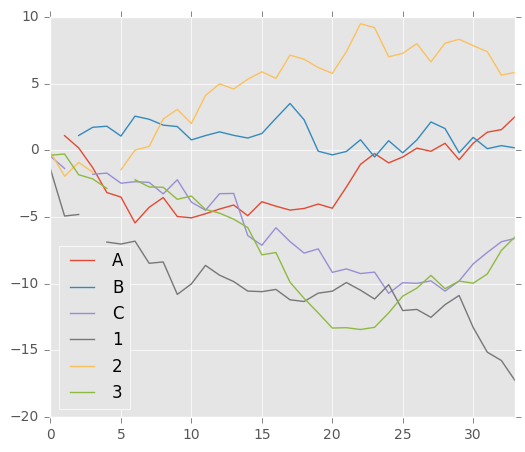

In [181]:
print random_walk_df
random_walk_df = random_walk_df.reset_index()
print ""
print random_walk_df.columns
print ""
print random_walk_df
del random_walk_df['index'] # or df.drop('index', inplace=True, axis=1)
print ""
print random_walk_df.columns

random_walk_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122c7b690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121ef1b50>]], dtype=object)

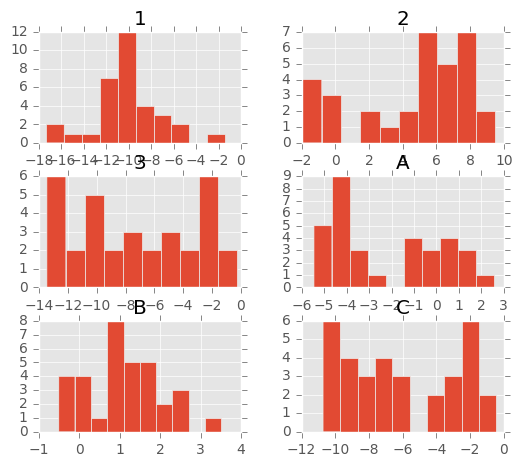

In [183]:
plt.figure()
random_walk_df.hist()
#plt.tight_layout()

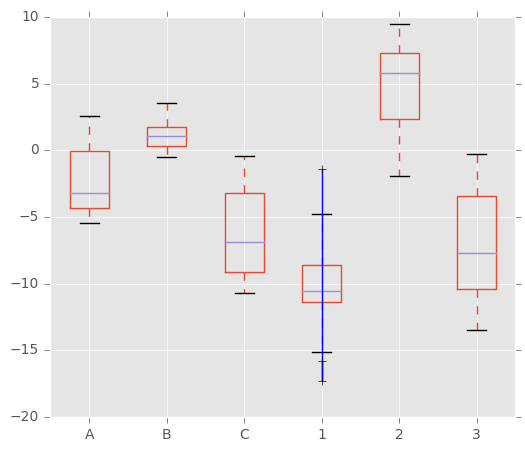

In [188]:
random_walk_df.plot(kind='box')

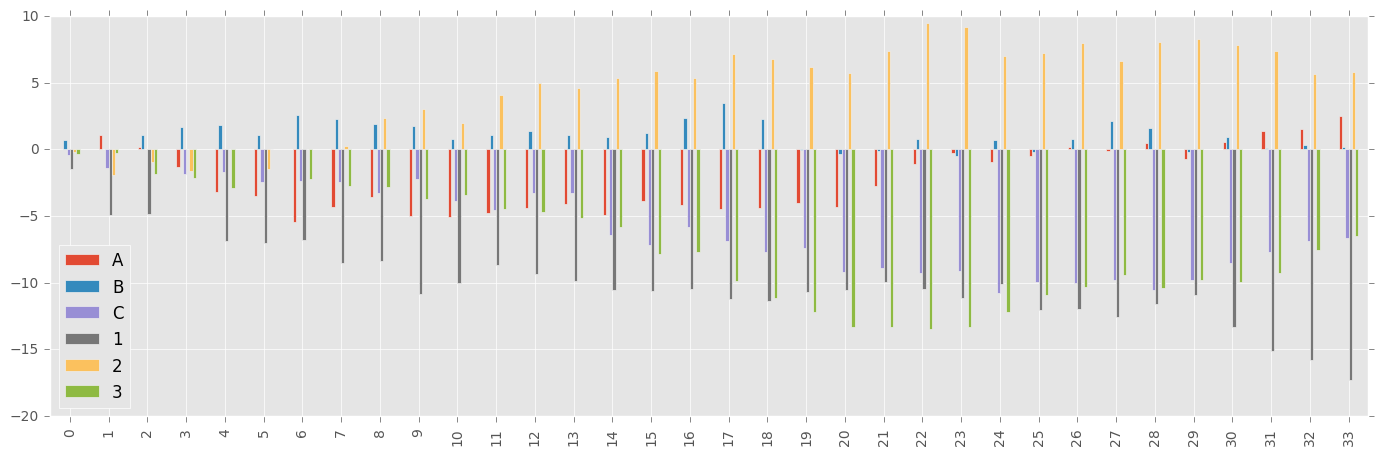

In [185]:
pylab.rcParams['figure.figsize']=(17,5)
random_walk_df.plot(kind='bar')
pylab.rcParams['figure.figsize']=(7,5)

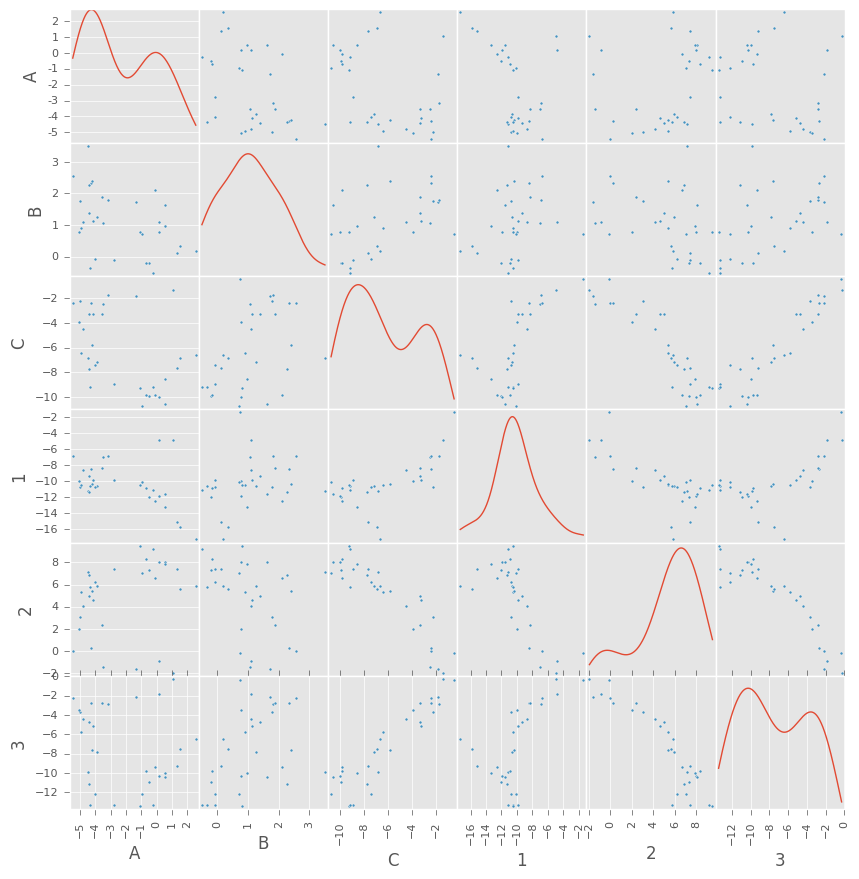

In [187]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(random_walk_df, alpha=0.9, figsize=(10, 10), diagonal='kde')
pylab.rcParams['figure.figsize']=(6,5)

* http://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org
* http://matplotlib.org/users/style_sheets.html
* https://stanford.edu/~mwaskom/software/seaborn/ 
* http://bokeh.pydata.org/en/latest/


# Elementwise Operations
* with broadcasting

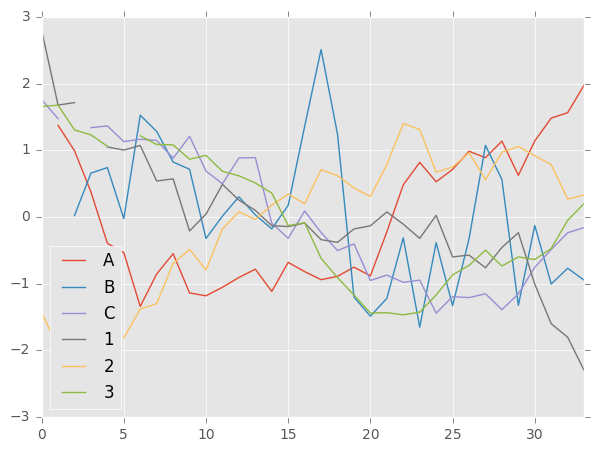

In [190]:
pylab.rcParams['figure.figsize']=(7,5)
standarized_walk_df = (random_walk_df - random_walk_df.mean()) / random_walk_df.std()

plt.figure()
standarized_walk_df.plot()
pylab.rcParams['figure.figsize']=(6,5)

In [195]:
tmp = noise_df[["1","2","3"]] #.copy()? # tmp.iloc[1,1] = 1.0 # print noise_df.iloc[1,1]

print noise_df[:6]
print ""
print tmp[:6]

#tmp.columns = list('ABC')
noise_df[["A","B","C"]] + tmp

                   A         B         C         1         2         3
1982-11-07       NaN  0.720140 -0.449928 -1.433888 -0.156901 -0.371360
1983-11-07  1.092217       NaN -0.917949 -3.502146 -1.793512  0.084676
1984-11-07 -0.918279  0.385303       NaN  0.116692  1.033800 -1.552077
1985-11-07 -1.488699  0.614259 -0.434271       NaN -0.731109 -0.315260
1986-11-07 -1.859836  0.079724  0.086075 -2.069957       NaN -0.711117
1987-11-07 -0.338015 -0.737378 -0.757799 -0.146810  0.183388       NaN

                   1         2         3
1982-11-07 -1.433888 -0.156901 -0.371360
1983-11-07 -3.502146 -1.793512  0.084676
1984-11-07  0.116692  1.033800 -1.552077
1985-11-07       NaN -0.731109 -0.315260
1986-11-07 -2.069957       NaN -0.711117
1987-11-07 -0.146810  0.183388       NaN


,1,2,3,A,B,C
1982-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1983-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1984-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1985-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1986-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1987-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1988-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1989-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1990-11-07,NaN,NaN,NaN,NaN,NaN,NaN
1991-11-07,NaN,NaN,NaN,NaN,NaN,NaN


# Concatenating
* adding *rows*
* see also: df.append()
* http://pandas.pydata.org/pandas-docs/stable/merging.html

In [253]:
print noise_df[:3]
print ""
print noise_df[30:]
print ""
print pd.concat([noise_df[:3],noise_df[30:]])

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777

                   A         B         C         1         2         3
2012-11-07 -0.192406 -1.040221  0.526933 -0.728467  0.133072  0.258659
2013-11-07  0.288575 -1.975519 -1.623684 -0.092136  1.760563  0.382124
2014-11-07  0.012224 -0.243021  0.044564  1.148207  0.622514  0.906184
2015-11-07  0.527937  0.177839 -1.221750  1.244011 -1.173027  0.940723

                   A         B         C         1         2         3
1982-11-07       NaN -0.315372  2.039151  1.457285  0.129330 -1.324212
1983-11-07  1.143640       NaN  0.413200 -0.368386  0.771809 -0.613966
1984-11-07 -0.847588  1.204021       NaN  0.138808 -0.435669  1.843777
2012-11-07 -0.192406 -1.040221  0.526933 -0.728467  0.133072  0.258659
2013

In [99]:
pd.concat([noise_df[["1","2","3"]],noise_df[["A","B","C"]]])

,1,2,3,A,B,C
1982-11-07,0.481440,-0.391459,-0.662913,NaN,NaN,NaN
1983-11-07,1.301743,-0.493585,-1.221645,NaN,NaN,NaN
1984-11-07,-0.927520,0.162035,-0.332009,NaN,NaN,NaN
1985-11-07,NaN,-0.458858,1.552695,NaN,NaN,NaN
1986-11-07,-0.164963,NaN,-1.573577,NaN,NaN,NaN
1987-11-07,1.097457,0.209988,NaN,NaN,NaN,NaN
1988-11-07,-0.732218,1.295821,1.109678,NaN,NaN,NaN
1989-11-07,-0.410553,-1.076539,0.546845,NaN,NaN,NaN
1990-11-07,-0.678611,0.208063,2.070915,NaN,NaN,NaN
1991-11-07,-0.194351,0.280831,0.538520,NaN,NaN,NaN


In [203]:
A = noise_df[["1","2","3"]]
A = A.reset_index()
del A['index']
A.columns = list('ABC')

B = noise_df[["A","B","C"]]
B = B.reset_index()
del B['index']

C = pd.concat([A,B])
print C
print ""
print C.loc[1,:] # what's going on here with multiple results?
print ""
C = pd.concat([A,B],ignore_index=True)
print C
print ""
print C.loc[1,:] # did that fix it?

           A         B         C
0  -1.433888 -0.156901 -0.371360
1  -3.502146 -1.793512  0.084676
2   0.116692  1.033800 -1.552077
3        NaN -0.731109 -0.315260
4  -2.069957       NaN -0.711117
5  -0.146810  0.183388       NaN
6   0.215653  1.473136  0.653894
7  -1.660118  0.277783 -0.543528
8   0.101139  2.054751 -0.024293
9  -2.434177  0.721324 -0.902216
10  0.788165 -1.058438  0.243310
11  1.386423  2.102875 -1.003659
12 -0.733716  0.869899 -0.278630
13 -0.478786 -0.385980 -0.450526
14 -0.713116  0.733741 -0.633271
15 -0.042769  0.560315 -2.039903
16  0.166916 -0.494490  0.169668
17 -0.779114  1.743720 -2.225117
18 -0.127530 -0.312688 -1.210417
19  0.628180 -0.623577 -1.093183
20  0.147293 -0.435454 -1.133054
21  0.648635  1.630361  0.024119
22 -0.573554  2.097458 -0.134082
23 -0.661245 -0.298795  0.164012
24  1.073723 -2.184929  1.082704
25 -1.941625  0.261028  1.257641
26  0.085102  0.729640  0.598842
27 -0.592560 -1.373630  0.954537
28  0.949528  1.401158 -0.996978
29  0.6899

# Merging
* adding *columns*
* see also: df.join
* http://pandas.pydata.org/pandas-docs/stable/merging.html

In [206]:
schools_df = pd.read_csv('Schools.csv')
print schools_df[:3] 
print schools_df.shape
players_df = pd.read_csv('SchoolsPlayers.csv')
print ""
print players_df[:3]
print players_df.shape

pd.merge(schools_df, players_df, on='schoolID')

     schoolID                    schoolName   schoolCity schoolState  \
0  abilchrist  Abilene Christian University      Abilene          TX   
1     adelphi            Adelphi University  Garden City          NY   
2    adrianmi                Adrian College       Adrian          MI   

  schoolNick  
0   Wildcats  
1   Panthers  
2   Bulldogs  
(749, 5)

    playerID schoolID  yearMin  yearMax
0  aardsda01   pennst     2001     2001
1  aardsda01     rice     2002     2003
2  abbeybe01  vermont     1888     1892
(6147, 4)


,schoolID,schoolName,schoolCity,schoolState,schoolNick,playerID,yearMin,yearMax
0,abilchrist,Abilene Christian University,Abilene,TX,Wildcats,gilbrbi01,1966,1969
1,adelphi,Adelphi University,Garden City,NY,Panthers,sambijo01,1971,1973
2,adrianmi,Adrian College,Adrian,MI,Bulldogs,kisinru01,1895,1902
3,adrianmi,Adrian College,Adrian,MI,Bulldogs,roggecl01,1910,1914
4,akron,University of Akron,Akron,OH,Zips,birkbmi01,1980,1983
5,akron,University of Akron,Akron,OH,Zips,dilauja01,1962,1962
6,akron,University of Akron,Akron,OH,Zips,malasma01,1997,2000
7,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,avilaal01,2006,2008
8,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,barnere01,1925,1926
9,alabama,University of Alabama,Tuscaloosa,AL,Crimson Tide,baumgjo01,1950,1952


# SQL Style Joining
* Left, right, inner, outer...

In [208]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'foo','post'], 'rval': ["A", "B", "C"]})

print "X"
print left
print "\n" + "Y"
print right
print "\n" + "X outer join Y"
print pd.merge(left, right, on='key', how='outer')
print "\n" + "X inner join Y"
print pd.merge(left, right, on='key', how='inner')
print "\n" + "X left join Y"
print pd.merge(left, right, on='key', how='left')
print "\n" + "X right join Y"
print pd.merge(left, right, on='key', how='right')

X
   key  lval
0  foo     1
1  foo     2
2  bar     3

Y
    key rval
0   foo    A
1   foo    B
2  post    C

X outer join Y
    key  lval rval
0   foo   1.0    A
1   foo   1.0    B
2   foo   2.0    A
3   foo   2.0    B
4   bar   3.0  NaN
5  post   NaN    C

X inner join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B

X left join Y
   key  lval rval
0  foo     1    A
1  foo     1    B
2  foo     2    A
3  foo     2    B
4  bar     3  NaN

X right join Y
    key  lval rval
0   foo   1.0    A
1   foo   2.0    A
2   foo   1.0    B
3   foo   2.0    B
4  post   NaN    C


# Group By
* Aggregate, Apply
* http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [210]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

print df
print ""
df.groupby('A').size()

     A      B         C         D
0  foo    one  0.648051 -1.007308
1  bar    one -0.272542  1.054663
2  foo    two  0.088907 -0.470533
3  bar  three -1.486452  0.419593
4  foo    two -0.088910  0.694524
5  bar    two -0.823460  0.013245
6  foo    one  0.998002 -0.637990
7  foo  three  0.692716 -1.385465



A
bar    3
foo    5
dtype: int64

In [211]:
print df.groupby(['A','B']).sum()
print ""
print df.groupby('A').sum()

                  C         D
A   B                        
bar one   -0.272542  1.054663
    three -1.486452  0.419593
    two   -0.823460  0.013245
foo one    1.646052 -1.645298
    three  0.692716 -1.385465
    two   -0.000002  0.223991

            C         D
A                      
bar -2.582454  1.487501
foo  2.338766 -2.806772


# Remember, Sorting is just done as a sort -- *not* a Group By
* You just sort by mulptiple columns

In [212]:
print df.sort_values(by = ['A','C'])

     A      B         C         D
3  bar  three -1.486452  0.419593
5  bar    two -0.823460  0.013245
1  bar    one -0.272542  1.054663
4  foo    two -0.088910  0.694524
2  foo    two  0.088907 -0.470533
0  foo    one  0.648051 -1.007308
7  foo  three  0.692716 -1.385465
6  foo    one  0.998002 -0.637990


# Multi-Indexing
* group by structuring

In [213]:
index = pd.MultiIndex.from_tuples(names=['first', 'second'],
            tuples = list(zip(['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                              ['one', 'two', 'one', 'two','one', 'two', 'one', 'two'])))

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

A         B         C
first second                              
bar   one    -0.717183 -0.917971 -1.558754
      two     1.341449  0.442729 -0.332588
baz   one    -0.913387  0.088256  1.616313
      two    -2.530893 -0.110189 -1.498853
foo   one    -0.154381  0.497725  0.710612
      two    -0.519706 -1.258636  1.837671
qux   one    -0.610622  0.320693  1.366230
      two    -0.961140  0.451094  1.053810

# Stacking
* and unstacking

In [214]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.717183
               B   -0.917971
               C   -1.558754
       two     A    1.341449
               B    0.442729
               C   -0.332588
baz    one     A   -0.913387
               B    0.088256
               C    1.616313
       two     A   -2.530893
               B   -0.110189
               C   -1.498853
foo    one     A   -0.154381
               B    0.497725
               C    0.710612
       two     A   -0.519706
               B   -1.258636
               C    1.837671
qux    one     A   -0.610622
               B    0.320693
               C    1.366230
       two     A   -0.961140
               B    0.451094
               C    1.053810
dtype: float64

In [215]:
stacked.unstack() #.unstack() 

A         B         C
first second                              
bar   one    -0.717183 -0.917971 -1.558754
      two     1.341449  0.442729 -0.332588
baz   one    -0.913387  0.088256  1.616313
      two    -2.530893 -0.110189 -1.498853
foo   one    -0.154381  0.497725  0.710612
      two    -0.519706 -1.258636  1.837671
qux   one    -0.610622  0.320693  1.366230
      two    -0.961140  0.451094  1.053810

In [218]:
print stacked
stacked.unstack(0)

first  second   
bar    one     A   -0.717183
               B   -0.917971
               C   -1.558754
       two     A    1.341449
               B    0.442729
               C   -0.332588
baz    one     A   -0.913387
               B    0.088256
               C    1.616313
       two     A   -2.530893
               B   -0.110189
               C   -1.498853
foo    one     A   -0.154381
               B    0.497725
               C    0.710612
       two     A   -0.519706
               B   -1.258636
               C    1.837671
qux    one     A   -0.610622
               B    0.320693
               C    1.366230
       two     A   -0.961140
               B    0.451094
               C    1.053810
dtype: float64


first          bar       baz       foo       qux
second                                          
one    A -0.717183 -0.913387 -0.154381 -0.610622
       B -0.917971  0.088256  0.497725  0.320693
       C -1.558754  1.616313  0.710612  1.366230
two    A  1.341449 -2.530893 -0.519706 -0.961140
       B  0.442729 -0.110189 -1.258636  0.451094
       C -0.332588 -1.498853  1.837671  1.053810

# So we noted all the RDBMS support
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html


# And we've seen CSV import capability 

# Even .xlsx is supported
* http://pandas.pydata.org/pandas-docs/stable/io.html


# So is Pickle

# So is pretty much everything else

<br>

# *Of course we can write out in all of these formats, just like we can read in*

<br>





In [269]:
jes = pd.read_excel("/Users/schwarls37/Documents/Robert Distribution Environmental Data 2016.08.04.xlsx",
                    skiprows=1).iloc[:38,:]

jes.rename(columns = {'Evaluation Criteria':'Category', 'Unnamed: 1':'Evaluation Criteria'}, inplace = True)
jes['Route 2'] = pd.to_numeric(jes['Route 2'])
jes['Route 6'] = pd.to_numeric(jes['Route 6'])

jes

,Category,Evaluation Criteria,Priority,Route 1,Route 2,Route 3,Route 4,Route 5,Route 6,Route 7,Route 8,Route 9,Route 10,Route 11,Route 12,Route 13,Route 14,Route 15
0,Land Use,Length of alternative route,A,12.393319,12.532375,11.982177,12.186081,12.284948,11.905479,12.094633,11.955761,11.995765,12.338979,11.927838,11.854583,11.982839,11.851827,11.883971
1,Land Use,Number of habitable structures1 within 300 fee...,A,74.000000,60.000000,76.000000,85.000000,77.000000,87.000000,65.000000,63.000000,73.000000,86.000000,88.000000,69.000000,61.000000,65.000000,69.000000
2,Land Use,Length of route utilizing existing transmissio...,A,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444,2.349444
3,Land Use,Length of route parallel to existing transmiss...,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Land Use,Length of route parallel to other existing ROW...,B,9.014039,8.928521,7.826558,8.814067,7.149957,8.538980,5.304174,8.157521,6.968284,9.414494,8.227014,7.868760,4.650197,7.829883,6.314307
5,Land Use,Length of route parallel to apparent property ...,B,0.561264,0.569032,0.838428,0.542529,2.339473,0.537015,2.080869,1.071685,0.283924,0.277339,0.554503,1.450945,2.287281,1.465778,0.490337
6,Land Use,Length of route through parks/recreational areas3,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Land Use,Number of additional parks/recreational areas3...,B,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Land Use,Length of route through cropland,B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Land Use,Length of route through pasture/rangeland or o...,C,1.270120,0.822551,1.146895,1.270120,1.270120,1.146895,1.116145,0.693215,1.116145,0.937444,0.814219,0.710777,0.771413,0.049021,0.771413


# Pivot Tables
* http://pandas.pydata.org/pandas-docs/version/0.15.2/reshaping.html

In [124]:
pd.pivot_table(jes, index = ['Category', 'Priority'],
               aggfunc = [len, max], values = ['Route 1', 'Route 7'])

len                max           
                            Route 1 Route 7    Route 1    Route 7
Category           Priority                                      
Aesthetics         A            1.0     1.0   9.267968   4.558907
                   B            1.0     1.0   0.163165   0.163165
Cultural Resources A            2.0     2.0   0.000000   0.000000
                   B            1.0     1.0   0.000000   0.000000
                   C            2.0     2.0   6.914682   6.226903
Ecology            A            2.0     2.0   0.559585   2.361104
                   B            2.0     2.0   7.699197   6.117214
                   C            5.0     5.0  14.000000  13.000000
Land Use           A            3.0     3.0  74.000000  65.000000
                   B            6.0     6.0   9.014039   5.304174
                   C           13.0    13.0   9.000000   6.000000

In [279]:
m_pd = pd.merge(schools_df, players_df, on='schoolID')
pd.crosstab(m_pd.schoolState, m_pd.schoolNick)

schoolNick,49ers,Aggies,Anchormen,Anteaters,Antelopes,Argonauts,Auggies,Aztecs,Badgers,Bald Eagles,...,Waves,Wildcats,Wolfpack,Wolverines,Wolves,Wonder Boys,Yellow Jackets,Yellowjackets,Yeoman,Zips
schoolState,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
AZ,0,0,0,0,13,0,0,0,0,0,...,0,66,0,0,0,0,0,0,0,0
CA,33,1,0,5,0,0,0,37,0,0,...,30,2,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,0,0,0,0,2,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


# Some other "Intro To Pandas" notebooks that I like a lot
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/sallamander/numpy_notes.ipynb
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/numpy_pandas.ipynb  
* http://pandas.pydata.org/pandas-docs/stable/10min.html

# The Official Documentation
* http://pandas.pydata.org/pandas-docs/stable/index.html

# An In-House Cheat Sheet
* https://github.com/zipfian/precourse/tree/master/Chapter_4_Pandas#functions-i-use-all-the-time


<br>

# Question: 
# When should one use Pandas?

<br>

<br>


<br>


<br>


<br>

<br>



## E.g., "When a team of animals is need to pull a sled across the expansive frozen tundra"?

<br>


